### Generate Noise Directly in the Frequency Domain ###

It is sometimes useful to generate noise directly in the frequency domain. PyCBC provides functionality to generate noise that has the same spectrum as a PSD you provide. Note that due to how this is made, the equivelant time series will have circular boundary conditions.

In [1]:
import sys
!{sys.executable} -m pip install pycbc lalsuite ligo-common --no-cache-dir

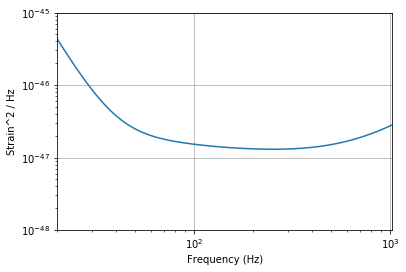

In [2]:
%matplotlib inline
import pycbc.noise
import pycbc.psd
import pylab

# Generate a PSD using an analytic expression for 
# the full design Advanced LIGO noise curve
f_lower = 10
duration = 128
sample_rate = 4096
tsamples = sample_rate * duration
fsamples = tsamples // 2 + 1
df = 1.0 / duration
psd = pycbc.psd.from_string('aLIGOZeroDetHighPower', fsamples, df, f_lower)

# Let's take a look at the spectrum
pylab.loglog(psd.sample_frequencies, psd)
pylab.xlim(20, 1024)
pylab.ylim(1e-48, 1e-45)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Strain^2 / Hz')
pylab.grid()

In [6]:
# Now, let's generate noise that has the same spectrum
htilde = pycbc.noise.frequency_noise_from_psd(psd, seed=857)

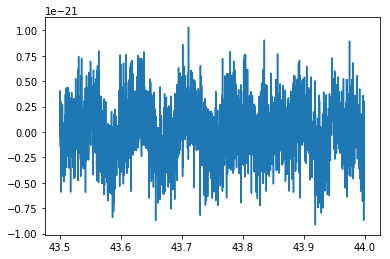

In [4]:
# Equivelantly in the time domain
hoft = htilde.to_timeseries()

# Well zoom in around a short time
hoft_zoom = hoft.time_slice(43.5, 44)
pylab.plot(hoft_zoom.sample_times, hoft_zoom)

# Notice the extreme difference in amplitudes of noise at different frequencies.
# You can see clearly the loud low frequency noise.

(1e-48, 1e-45)

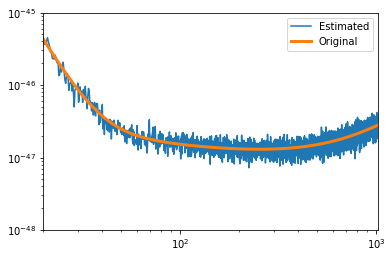

In [5]:
# Now we can verify that the PSD of this noise is as expected. 

# Use Welch's method with 4s segments
psd_estimated = hoft.psd(4)

pylab.loglog(psd_estimated.sample_frequencies, psd_estimated, label='Estimated')
pylab.loglog(psd.sample_frequencies, psd, label='Original', linewidth=3)
pylab.legend()
pylab.xlim(20, 1024)
pylab.ylim(1e-48, 1e-45)